### 1.	Data Cleaning and Preparation:

#### Load the dataset into a DataFrame or equivalent data structure.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [31]:
df=pd.read_csv('Cardiotocographic.csv')

In [32]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [33]:
df.shape

(2126, 14)

In [34]:
df.duplicated().sum()

2

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [43]:
df.describe()

,LB,AC,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.004391,0.001895,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.003340,0.003343,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.014925,-0.015393,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.001851,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.004484,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.006536,0.003289,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.030002,0.030769,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### Handle missing values appropriately (e.g., imputation, deletion).

In [36]:
df=df.drop(columns=['DS','DP','FM'])

In [37]:
df

,LB,AC,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [38]:
df.shape

(2126, 11)

In [41]:
zero_counts=(df==0.000000).sum()## zero counts
zero_counts

LB             0
AC           833
UC           318
DL          1166
ASTV           0
MSTV           0
ALTV        1168
MLTV         124
Width          0
Tendency    1037
NSP            0
dtype: int64

In [40]:
imputed=SimpleImputer(strategy='median')

In [48]:
df_imputed = pd.DataFrame(imputed.fit_transform(df), columns=df.columns)

In [49]:
df_imputed

,LB,AC,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


#### Detect and treat outliers if necessary.

In [50]:
def outlier_capping(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [51]:
for col in df_imputed.select_dtypes(include=['float','int']).columns:
    outlier_capping(df_imputed,col)

In [54]:
df_imputed.shape

(2126, 11)

### 2.	Statistical Summary:

In [55]:
df_imputed

,LB,AC,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


In [56]:
Mean=df_imputed.mean()
Mean

LB          133.290331
AC            0.003132
UC            0.004362
DL            0.001770
ASTV         46.981873
MSTV          1.304644
ALTV          6.691678
MLTV          8.007471
Width        70.287203
Tendency      0.316537
NSP           1.000000
dtype: float64

In [57]:
Median=df_imputed.median()
Median

LB          133.000000
AC            0.001634
UC            0.004484
DL            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [58]:
Standared_deviation=df_imputed.std()
Standared_deviation

LB           9.930268
AC           0.003828
UC           0.003001
DL           0.002668
ASTV        17.612745
MSTV         0.781091
ALTV        10.378400
MLTV         5.047078
Width       39.571995
Tendency     0.622406
NSP          0.000000
dtype: float64

In [61]:
Interquartile_Range=df_imputed.quantile(0.75)-df_imputed.quantile(0.25)
Interquartile_Range    

LB          14.000000
AC           0.005606
UC           0.004685
DL           0.003289
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

#### 	Create histograms or boxplots to visualize the distributions of various numerical variables

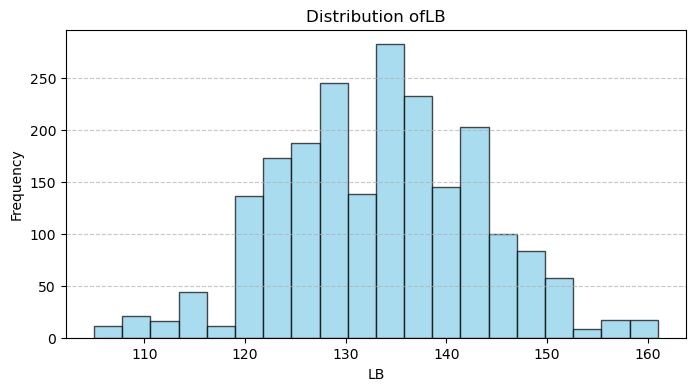

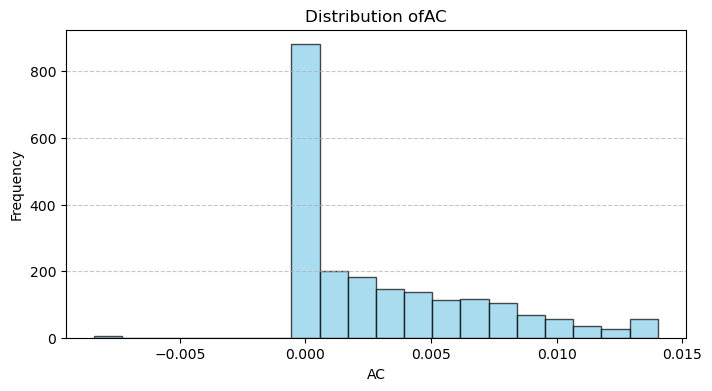

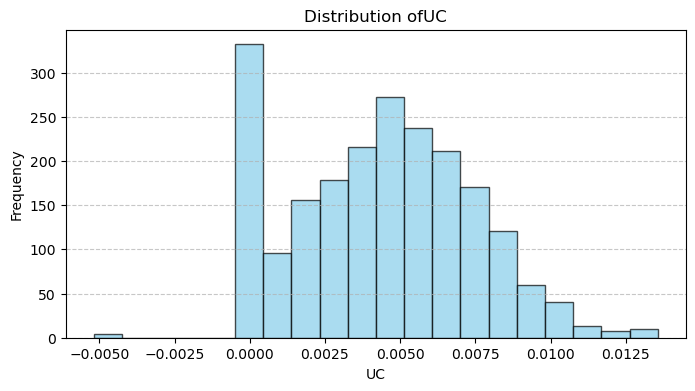

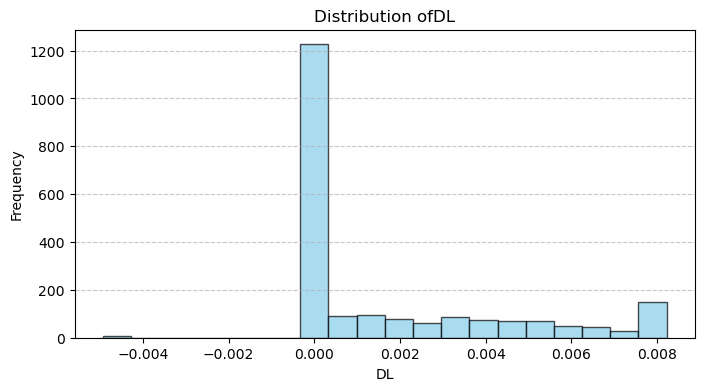

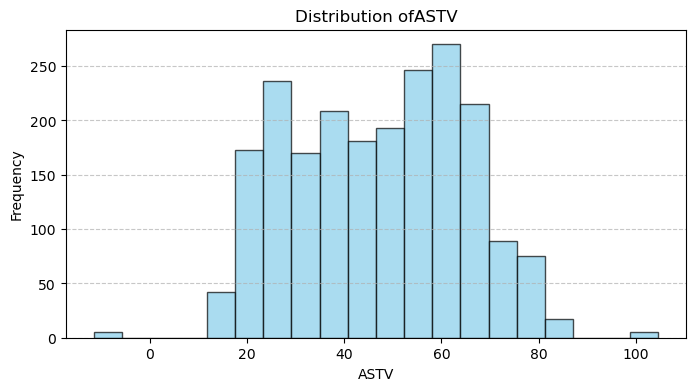

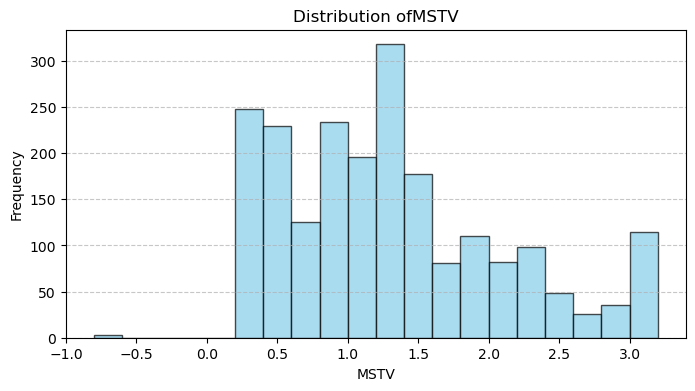

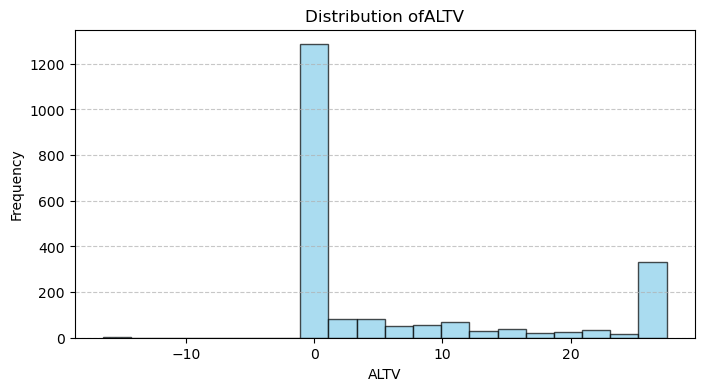

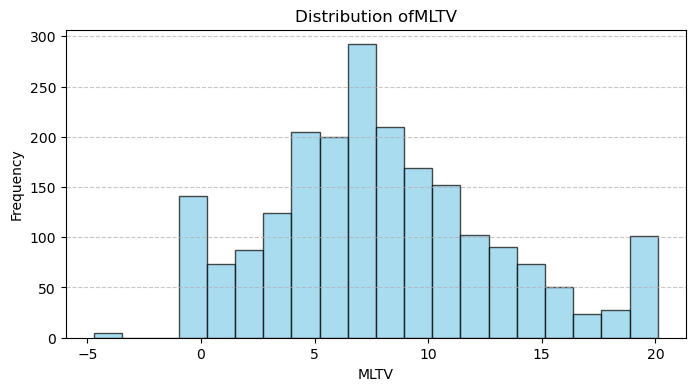

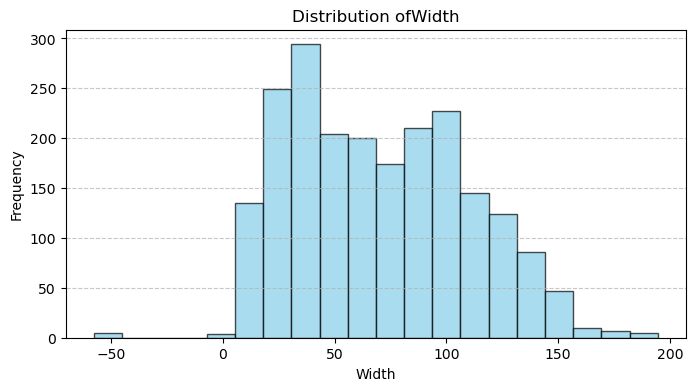

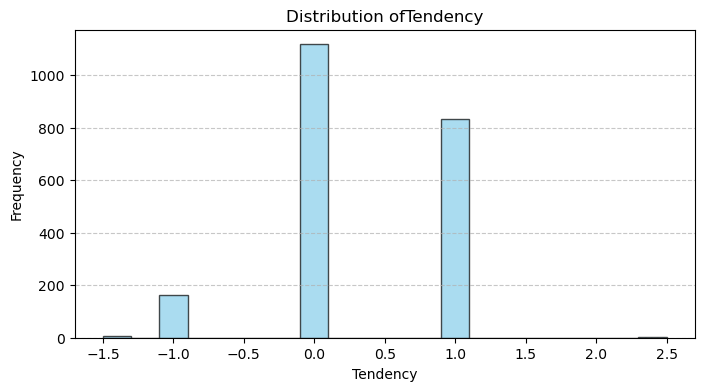

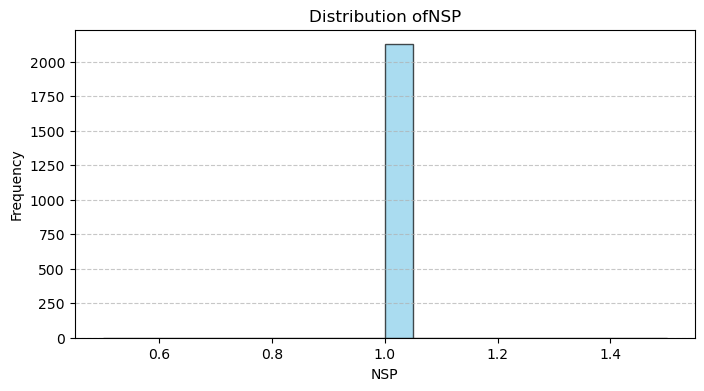

In [66]:
for column in df_imputed:
    plt.figure(figsize=(8,4))
    plt.hist(df_imputed[column],bins=20,color='skyblue',edgecolor='black',alpha=0.7)
    plt.title(f'Distribution of{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.show()

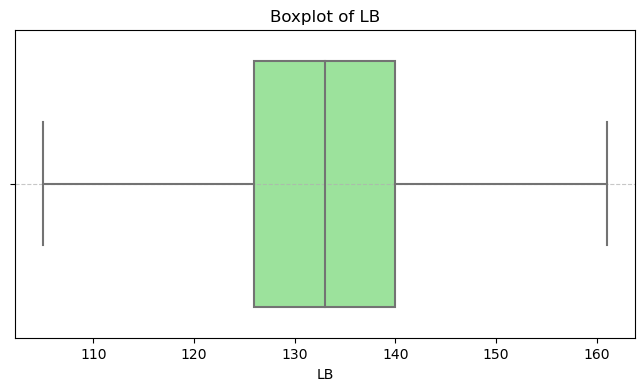

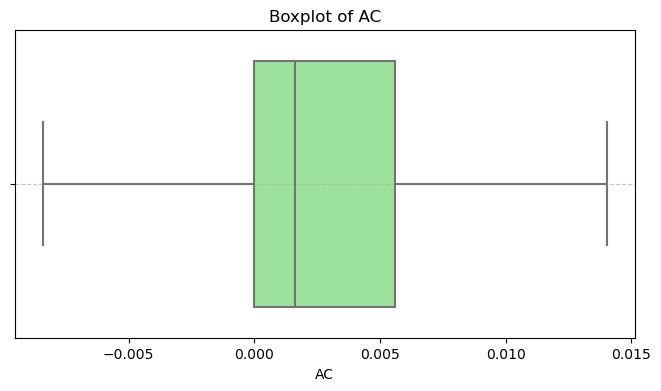

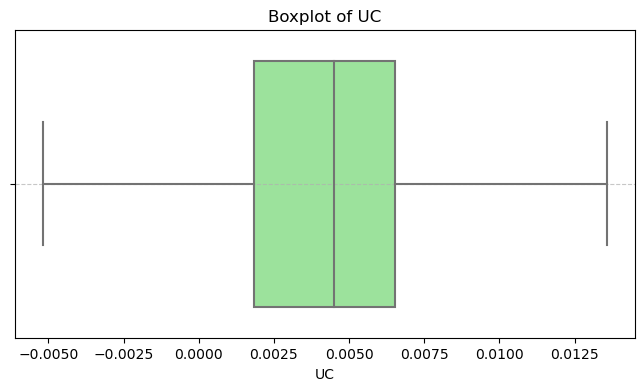

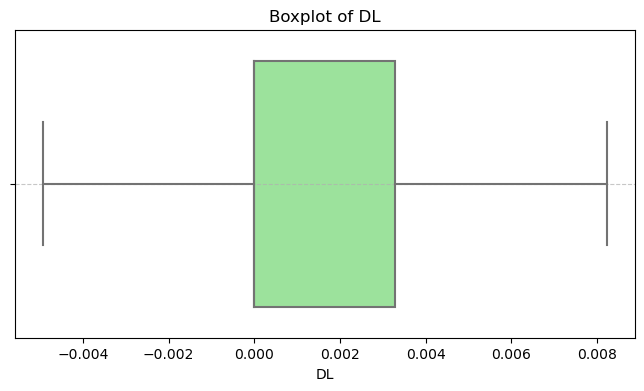

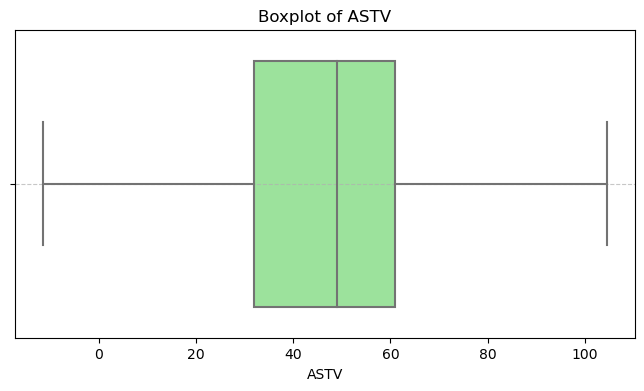

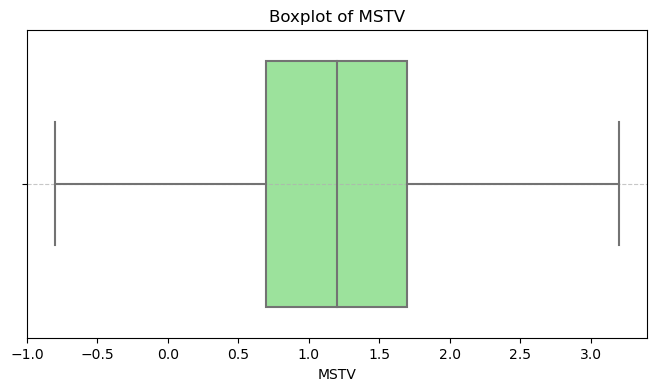

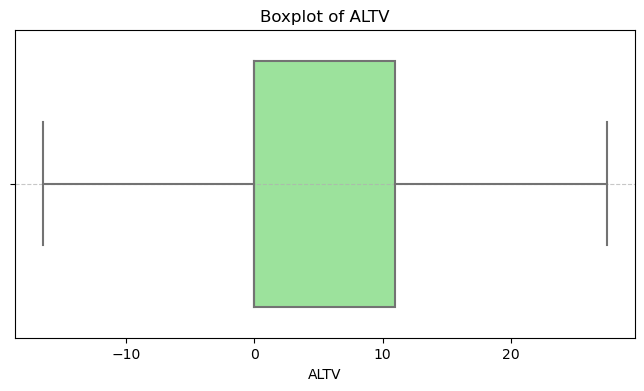

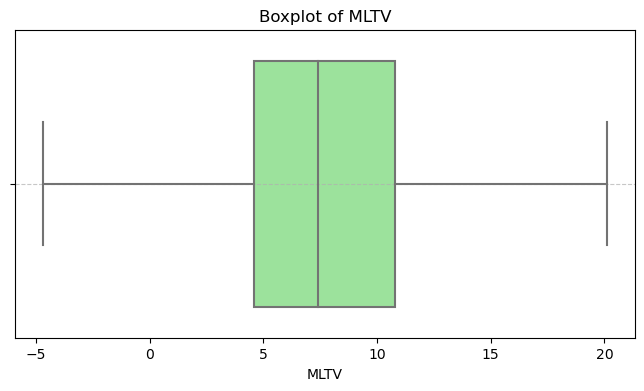

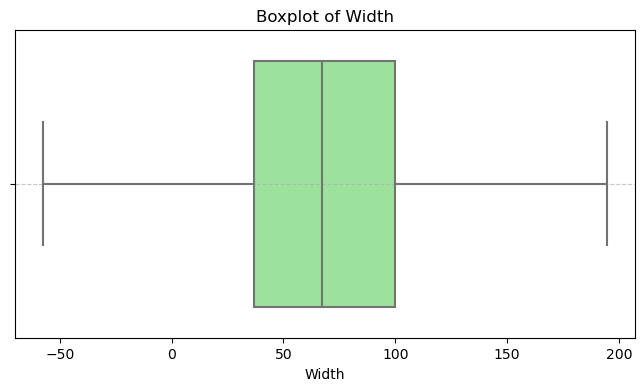

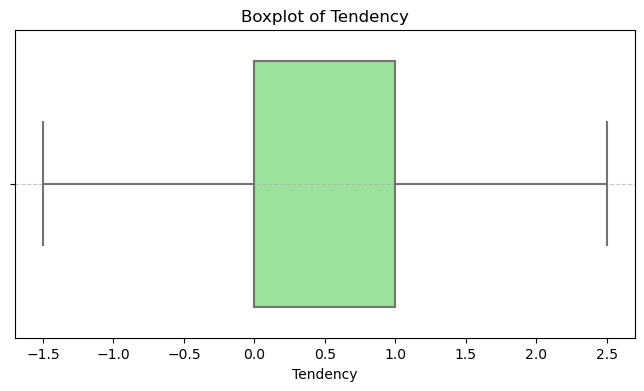

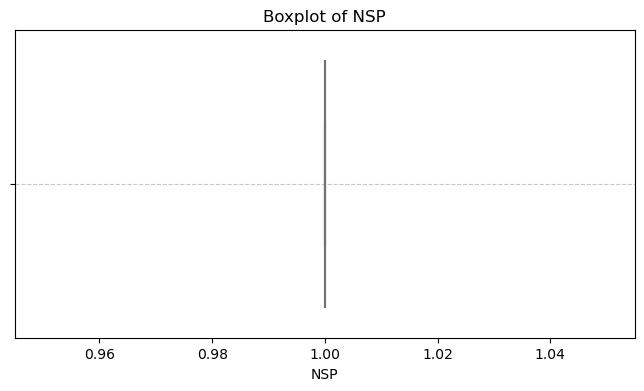

In [65]:
for column in df_imputed:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_imputed,x=column,color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.show()

#### Use bar charts or pie charts to display the frequency of categories for categorical variables.

#### 	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

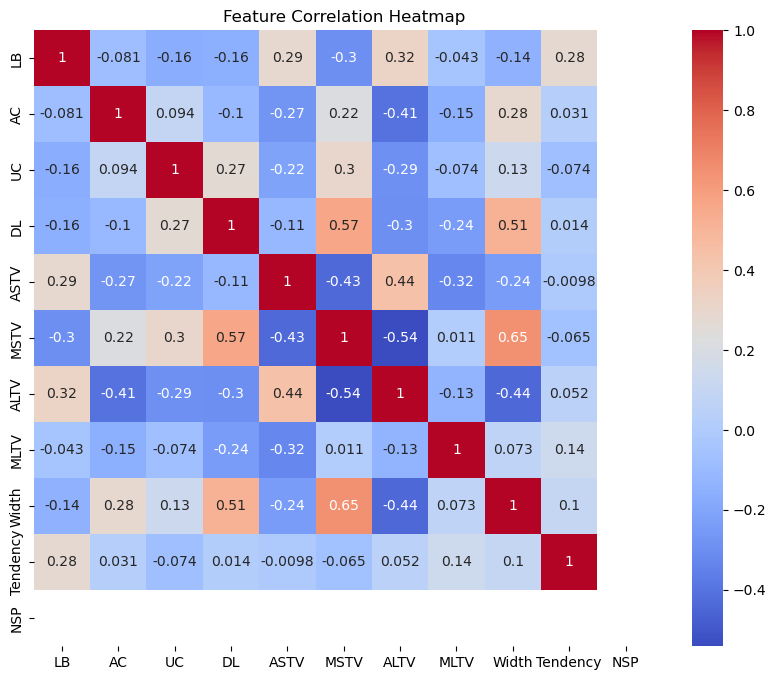

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df_imputed.corr(),annot=True,cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

#### Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

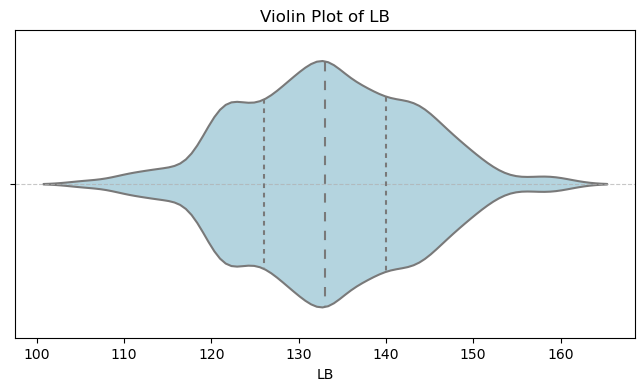

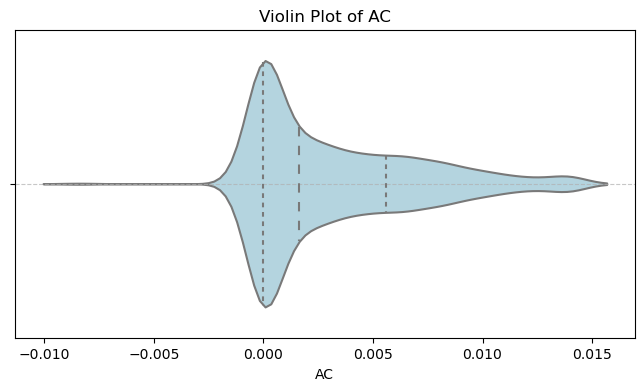

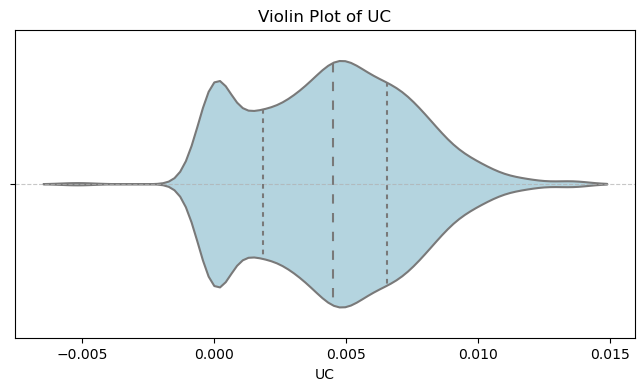

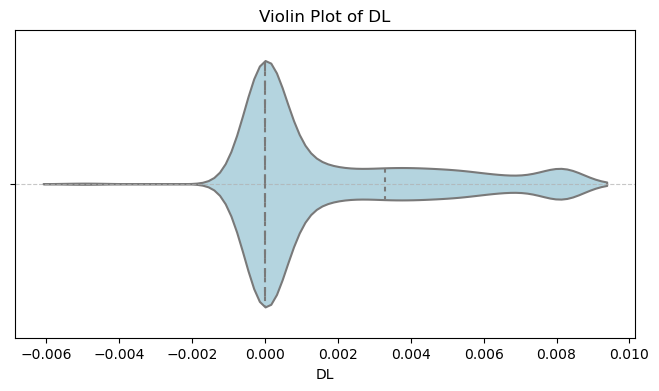

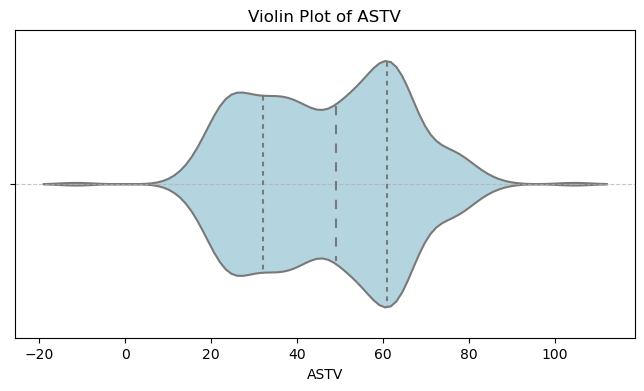

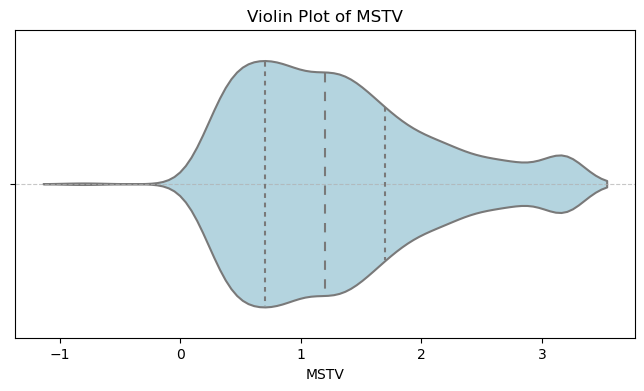

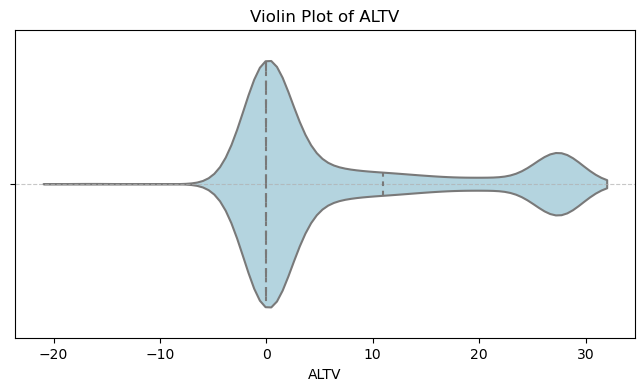

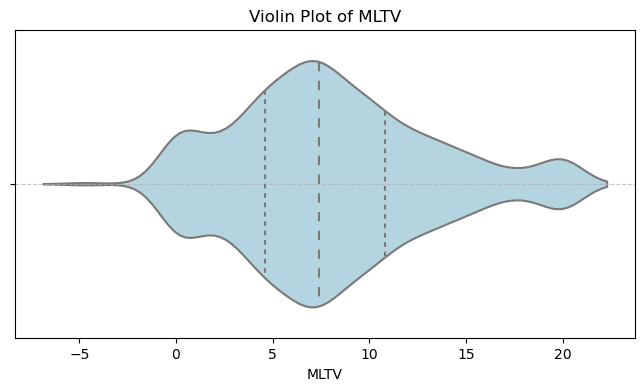

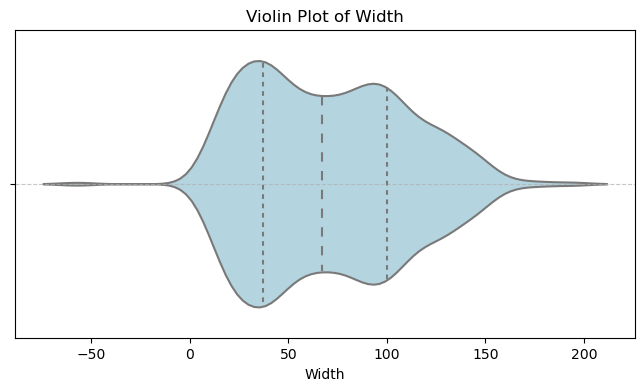

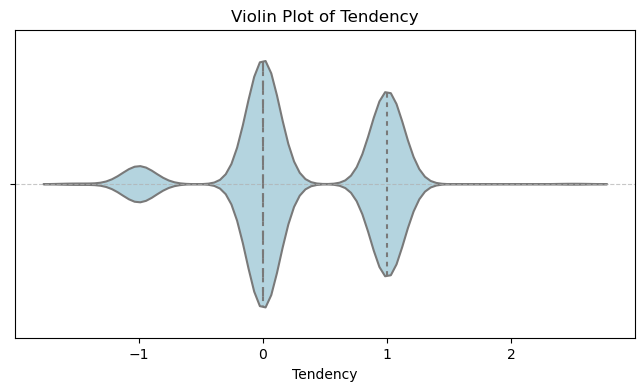

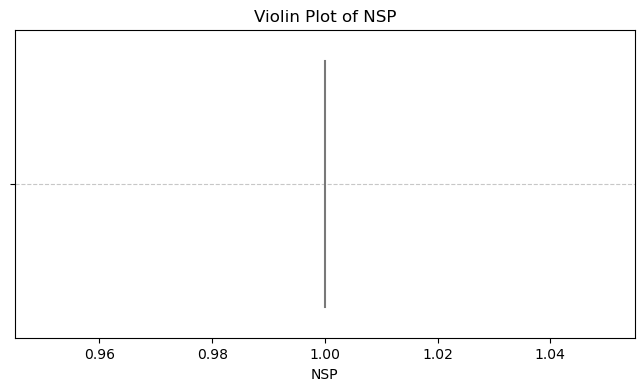

In [73]:
for column in df_imputed:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df_imputed, x=column, inner="quartile", color='lightblue')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### 4.	Pattern Recognition and Insights:

# Key Insights
* **Strongly Correlated :**
* The pair of columns (Width,MSTV), (Width,DL) and (MSTV,DL) are highly correlated with each other with the value 0.54 almost. It indicates that when the value increase one another column value also increases simultaneously.

* **Moderate Correlation :**
* The pair of column (LB,Tendency),(FM,ASTV) and (DL,Tendency) are moderately correlated with each other.

* **Weak Correlation :**
* The columns (MLTV,AC),(ALTV,AC),(MLTV,ASTV),(ALTV,MSTV) are with weak correlation or negative correlation.It indicates that when the value increase in the one column then the value is decrease in the another column

**The dataset set does not contains any date column so it is difficult to Look for trends or patterns over time**
# Conclusion:
# Key Insights:
**Distribution Characteristics:**

* Many variables exhibit skewness, indicating non-normal distributions. Variables such as 'AC', 'FM', and 'NSP' show significant skewness, suggesting that they may require transformations for certain statistical analyses.

**Correlation Patterns:**

* Strong positive correlations were identified between variables like MSTV and DL, as well as Width and MSTV. These relationships suggest that certain measures of variability are closely related.

**Variable Importance:**

* The 'LB' variable has a wide range, indicating variability in fetal heart rates across observations. This could be critical for assessing fetal well-being.

**Potential Redundancies:**

* High correlations between certain variables suggest redundancy, which could be considered in model development to avoid multicollinearity.
# Further Analyses:

**Clinical Monitoring:**

Understanding the relationships between different cardiotocographic measures can enhance clinical decision-making in fetal monitoring. For instance, recognizing that higher short-term variability correlates with abnormal long-term variability can help clinicians identify at-risk fetuses more effectively.

**Predictive Modeling:**

The insights gained from the correlation analysis can inform the selection of features for predictive models. Variables that are strongly correlated with outcomes of interest can be prioritized in model development.

**Data Transformation:**

The non-normal distributions of several variables suggest that data transformations may be necessary to meet the assumptions of parametric statistical tests.